# Importando pacotes

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lendo o arquivo e plotando em cores cinzas

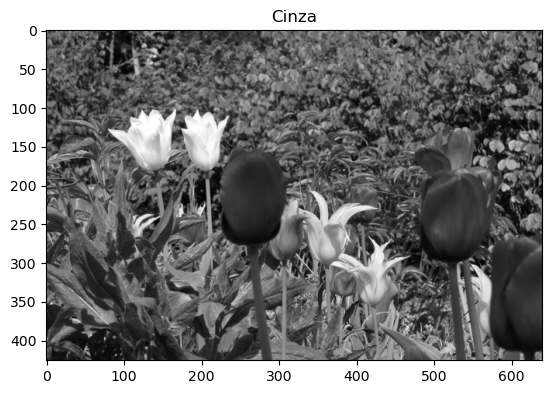

In [2]:
arquivo = 'flowers4.png'

flowers = cv2.imread(arquivo) 
flowg = cv2.cvtColor(flowers, cv2.COLOR_BGR2GRAY)
plt.imshow(flowg, cmap='gray')
plt.title('Cinza')
plt.show()

# Agora abrindo em Double

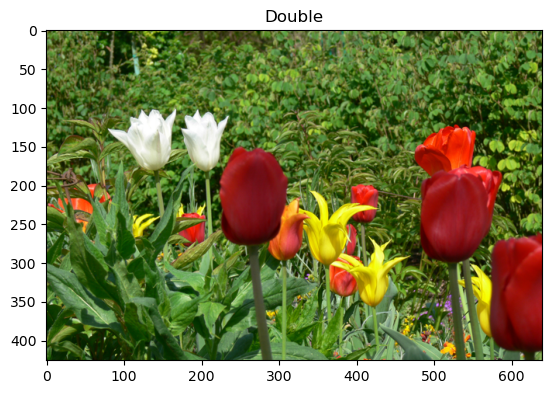

In [3]:
florgb = cv2.cvtColor(flowers, cv2.COLOR_BGR2RGB)
flord = florgb.astype(np.float64)
flordd = flord/255.0
plt.imshow(flordd)
plt.title('Double')
plt.show()

# Gerando o kU

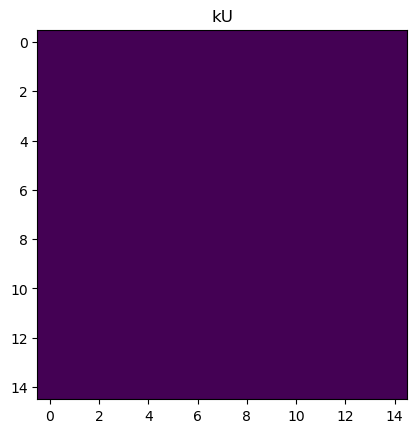

In [4]:
kU = np.ones((15,15)) / 225.0
plt.imshow(kU)
plt.title('kU')
plt.show()

# Aplicando kU na imagem double com iconv() e plotando 

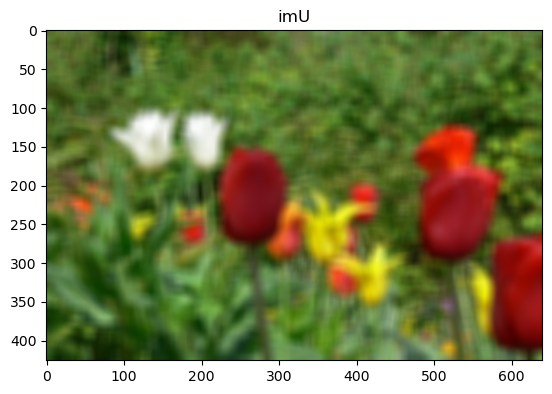

In [5]:
def iconv(src, kernel):
    aplicada = cv2.filter2D(src, -1, kernel)
    ap2 = np.clip(aplicada, 0.0, 1.0)
    return ap2
imU = iconv(flordd, kU)
plt.imshow(imU)
plt.title('imU')
plt.show()

# Gerando kG com kgauss() e plotando

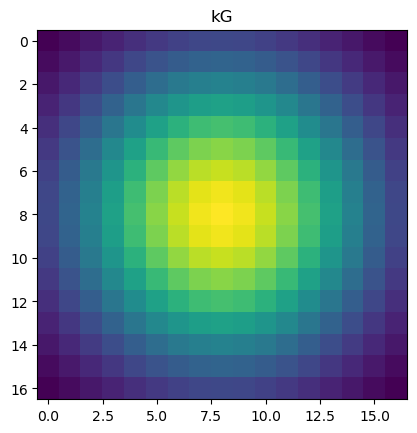

In [6]:
def kgauss(sigma, ml):
    ksize = (2 * ml) + 1
    k1 = cv2.getGaussianKernel(ksize , sigma)
    k2 = cv2.transpose(k1)
    kfinal = k1 @ k2
    return kfinal
kG = kgauss(5, 8)

plt.imshow(kG)
plt.title('kG')
plt.show()

# Aplicando kG na imagem double e plotando

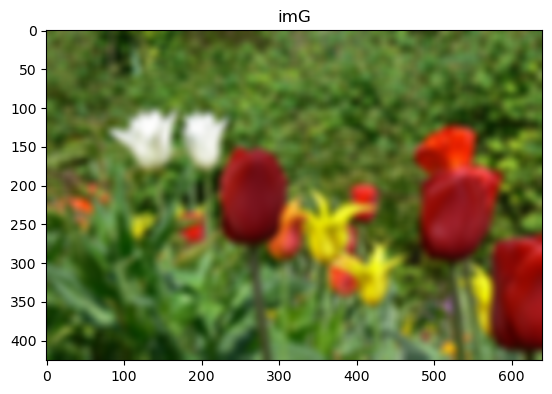

In [7]:
imG = cv2.filter2D(flordd, -1, kG)

plt.imshow(imG)
plt.title('imG')
plt.show()

# Observando as imagens:
### Comparando as duas imagens lado a lado, a maior diferença visível é fato que na imU é possívl notar linhas tanto verticais quanto horizontais, trazendo um aspecto meio quadriculado para a foto, já na imG, esse fenômeno não é observado, tendo um borrão mais 'redondo'.

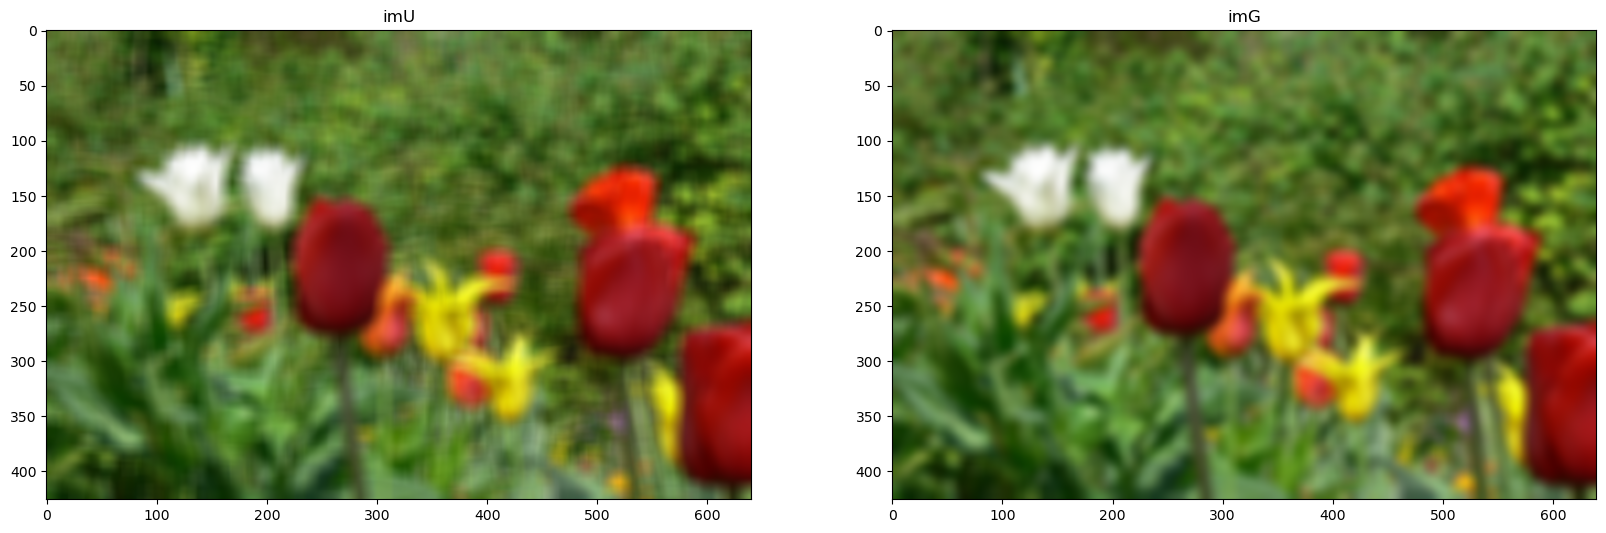

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.imshow(imU)
plt.title('imU')

plt.subplot(1, 2, 2)
plt.imshow(imG)
plt.title('imG')
plt.show()